### 비지도 학습의 개요
- 비지도 학습(Unsupervised Learning)은 기계 학습의 일종으로, 데이터가 어떻게 구성되었는지를 알아내는 문제의 범주에 속한다.
- 이 방법은 지도 학습(Supervised Learning) 혹은 강화 학습(Reinforcement Learning)과는 달리 입력값에 대한 목표치가 주어지지 않는다.
- 종류
  - 차원 축소: PCA, LDA, SVD
  - 군집화: KMeans Clustering, DBSCAN
  - 군집화 평가

### 차원 축소
- feature의 갯수를 줄이는 것을 뛰어 넘어, 특징을 추출하는 역할을 하기도 함.
- 계산 비용을 감소하는 효과
- 전반적인 데이터에 대한 이해도를 높이는 효과

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd

In [3]:
#데이터 로드 및 확인
iris = datasets.load_iris()
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
df = pd.DataFrame(data, columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
#타겟값 추가
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### PCA 차원축소
#### 선형 차원 축소 기법, 분산을 최대한 보존한다
#### -> 데이터과학 에서 분산으로 정보를 측정, 분산이 크다(넓게 퍼져있다)는 다양한 패턴이 있다는 듯, 따라서 분산을 보존하면서 차원을 축소한다는 점은 정보 손실을 최소화 하면서 진행 한다는점

- components에 1보다 작은 값을 넣으면, 분산을 기준으로 차원 축소
- components에 1보다 큰 값을 넣으면, 해당 값을 기준으로 feature를 축소

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [8]:
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)':'petal width (cm)'])
pca_data = pca.fit_transform(data_scaled)
data_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [9]:
pca_data[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

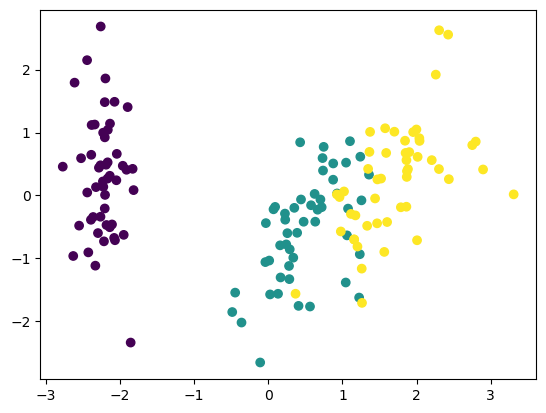

In [10]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

plt.scatter(pca_data[:,0], pca_data[:,1], c=df['target'])

In [11]:
pca = PCA(n_components=0.99)
pca_data = pca.fit_transform(data_scaled)
pca_data[:5]

array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ]])

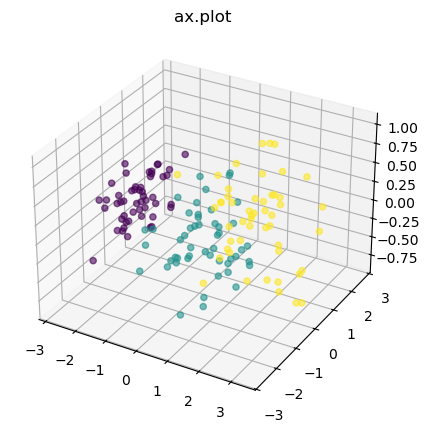

In [12]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1, projection='3d')

sample_size = 30
ax.scatter(pca_data[:,0], pca_data[:,1], pca_data[:,2], alpha=0.6, c=df['target'])
plt.title('ax.plot')
plt.show()

### LDA 차원 축소
#### LDA(Linear Discriminant Analysis): 선형 판별 분석법 (PCA와 유사)
- LDA는 클래스(Class) 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 내부 분산의 비율을 최대화 하는 방식으로 차원 축소

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [21]:
lda = LinearDiscriminantAnalysis()
data_scaled = StandardScaler().fit_transform(df.iloc[:, :-1])
lda_data = lda.fit_transform(data_scaled, df['target'])

In [22]:
lda_data[:5]

array([[ 8.06179978,  0.30042062],
       [ 7.12868772, -0.78666043],
       [ 7.48982797, -0.26538449],
       [ 6.81320057, -0.67063107],
       [ 8.13230933,  0.51446253]])

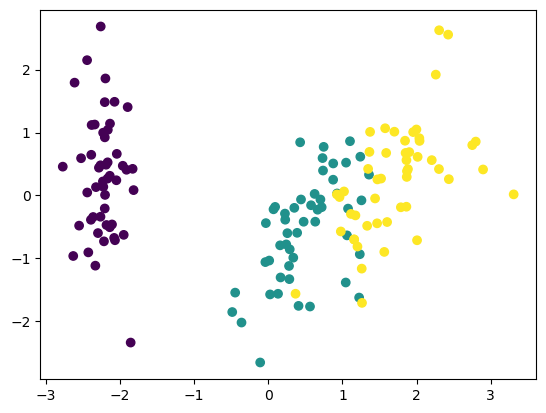

In [23]:
#PCA결과
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target'])
plt.show()

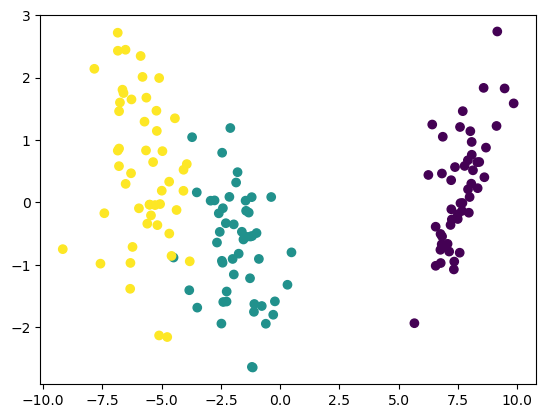

In [24]:
#LDA결과
plt.scatter(lda_data[:, 0], lda_data[:, 1], c=df['target'])
plt.show()


### SVD (Singular Value Decomposition)

- 상품의 추천 시스템에도 활용되어지는 알고리즘 (추천시스템)
- 특이값 분해기법입니다.
- PCA와 유사한 차원 축소 기법입니다.
- scikit-learn 패키지에서는 truncated SVD (aka LSA)을 사용합니다

In [25]:
from sklearn.decomposition import TruncatedSVD
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [26]:
data_scaled = StandardScaler().fit_transform(df.iloc[:, :-1])

In [27]:
svd = TruncatedSVD()
svd_data = svd.fit_transform(data_scaled)

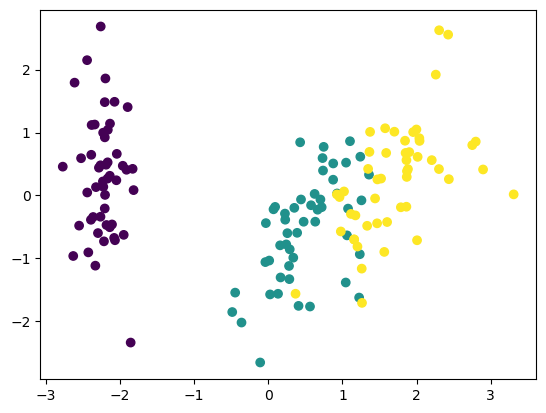

In [28]:
plt.scatter(pca_data[:, 0], pca_data[:,1], c=df['target'])
plt.show()

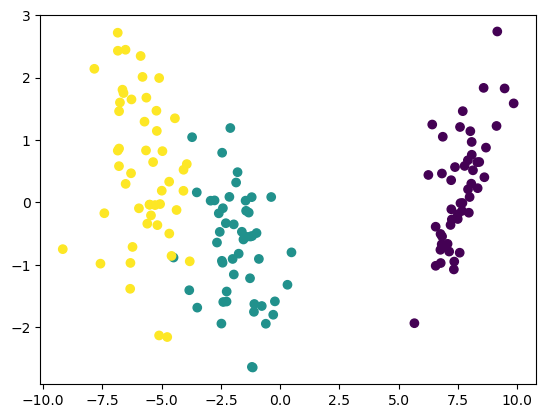

In [29]:
plt.scatter(lda_data[:, 0], lda_data[:, 1], c=df['target'])
plt.show()

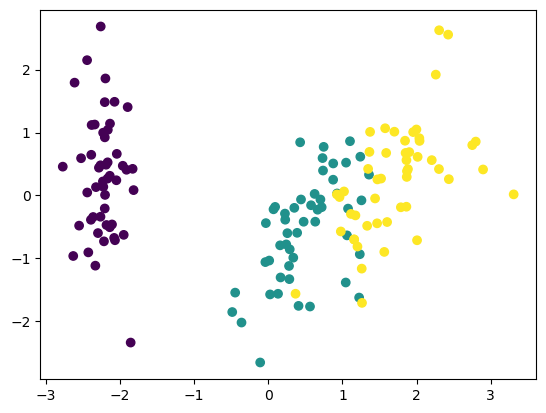

In [30]:

plt.scatter(svd_data[:, 0], svd_data[:, 1], c=df['target'])
plt.show()

### 군집화(K-Means Clustering)

군집화에서 가장 대중적으로 사용되는 알고리즘. <br>
centroid라는 중점을 기준으로 가장 가까운 포인트들을 선택하는 군집화 기법입니다.
사용되는 예제
- 스팸 문자 분류
- 뉴스 기사 분류


In [40]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
cluster_data = kmeans.fit_transform(df.iloc[:, : -1])

c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([[5.0595416 , 0.14135063, 3.41925061],
       [5.11494335, 0.44763825, 3.39857426],
       [5.27935534, 0.4171091 , 3.56935666],
       [5.15358977, 0.52533799, 3.42240962],
       [5.10433388, 0.18862662, 3.46726403],
       [4.68148797, 0.67703767, 3.14673162],
       [5.21147652, 0.4151867 , 3.51650264],
       [5.00252706, 0.06618157, 3.33654987],
       [5.32798107, 0.80745278, 3.57233779],
       [5.06790865, 0.37627118, 3.3583767 ],
       [4.89806763, 0.4824728 , 3.32449131],
       [4.9966845 , 0.25373214, 3.31126872],
       [5.19103612, 0.50077939, 3.46661272],
       [5.65173594, 0.91322505, 3.90578362],
       [5.10804455, 1.01409073, 3.646649  ],
       [4.88564095, 1.20481534, 3.49427881],
       [5.03090587, 0.6542018 , 3.495248  ],
       [5.02342022, 0.1441527 , 3.38444981],
       [4.61792995, 0.82436642, 3.11245944],
       [4.97213426, 0.38933276, 3.37738931],
       [4.6955761 , 0.46344363, 3.07471224],
       [4.9236821 , 0.3286031 , 3.31506588],
       [5.

In [33]:
cluster_data[:5]

array([[5.0595416 , 0.14135063, 3.41925061],
       [5.11494335, 0.44763825, 3.39857426],
       [5.27935534, 0.4171091 , 3.56935666],
       [5.15358977, 0.52533799, 3.42240962],
       [5.10433388, 0.18862662, 3.46726403]])

In [34]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

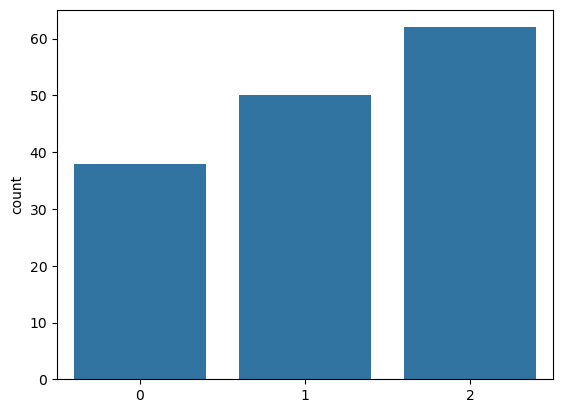

In [36]:
sns.countplot(x=kmeans.labels_)
plt.show()

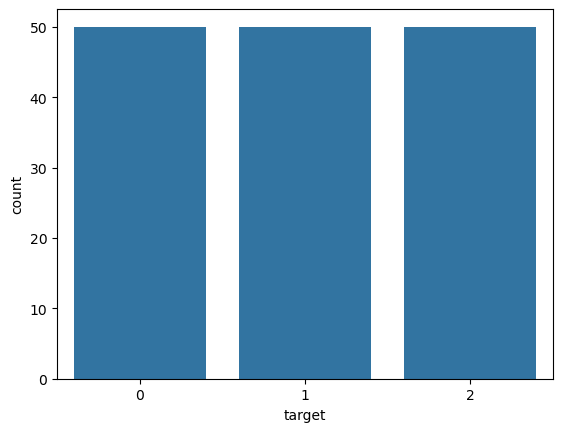

In [37]:
sns.countplot(x= df['target'])
plt.show()

In [38]:
kmeans

KMeans(n_clusters=3)

c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


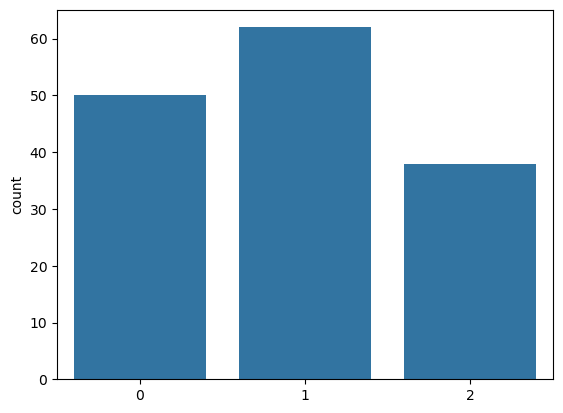

In [39]:
kmeans = KMeans(n_clusters=3, max_iter=500)
cluster_data = kmeans.fit_transform(df.iloc[:,:-1])
sns.countplot(x = kmeans.labels_)
plt.show()

###  DBSCAN (Density-based spatial clustering of applications with noise)
밀도 기반 클러스터링
- 밀도가 높은 부분을 클러스터링 하는 방식
- 어느점을 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식
- KMeans 에서는 n_cluster의 갯수를 반드시 지정해 주어야 하나, DBSCAN에서는 필요없음
- 기하학적인 clustering도 잘 찾아냄

In [41]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan_data = dbscan.fit_predict(df.iloc[:, :-1])
dbscan_data

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0, -1,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  2,
        3,  2,  4,  5, -1,  3,  6,  5, -1, -1, -1, -1,  7, -1,  5,  8,  4,
        9,  4, 10, -1, -1,  7,  5,  5, -1, -1,  7, -1,  4,  4,  4, -1,  8,
       -1,  2,  9,  4,  4,  4,  7,  4,  6,  4,  4,  4,  5, -1,  4, -1, 11,
       -1, 12, -1, 13, -1, 14, -1, -1, 15, -1, 16, 11, -1, -1, 12, -1, -1,
       -1, 17, -1, 13, 10, 17, -1, 10, 10, 18, -1, 14, -1, 18, -1, -1, -1,
       19, 12, 10, 16, 17, 20, 11, 17, 17, 20, 10, 15, 19, 10],
      dtype=int64)

### 실루엣 스코어 (군집화 평가)
클러스터링의 품질을 정량적으로 평가해 주는 지표

- 1: 클러스터링의 품질이 좋다
- 0: 클러스터링의 품질이 안좋다 (클러스터링의 의미 없음)
- 음수: 잘못 분류됨

In [42]:
from sklearn.metrics import silhouette_samples, silhouette_score
score = silhouette_score(data_scaled, kmeans.labels_)
score

0.44366157397640527

In [44]:
samples = silhouette_samples(data_scaled, kmeans.labels_)
samples[:5]

array([0.73318987, 0.57783809, 0.68201014, 0.62802187, 0.72693222])

In [59]:
def plot_silhouette(X, num_cluesters):
  for n_clusters in num_cluesters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
    "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10

    for i in range(n_clusters):
      # Aggregate the silhouette scores for samples belonging to
      # cluster i, and sort them
      ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

      ith_cluster_silhouette_values.sort()

      size_cluster_i = ith_cluster_silhouette_values.shape[0]
      y_upper = y_lower + size_cluster_i
      
      color = cm.nipy_spectral(float(i) / n_clusters)
      ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
        facecolor=color, edgecolor=color, alpha=0.7)
      
      # Label the silhouette plots with their cluster numbers at the middle
      ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

      # Compute the new y_lower for next plot
      y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
      ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
      s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                  fontsize=14, fontweight='bold')
    plt.show()


c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5817500491982808


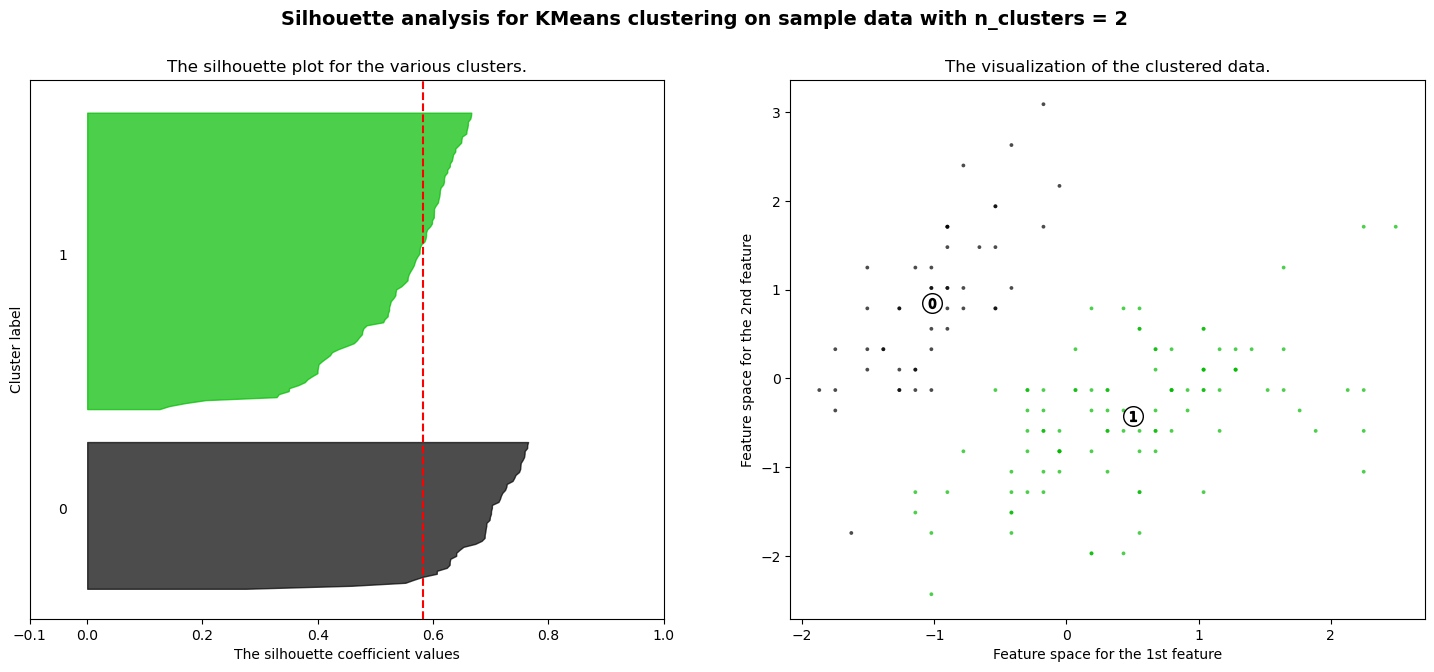

c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.45994823920518635


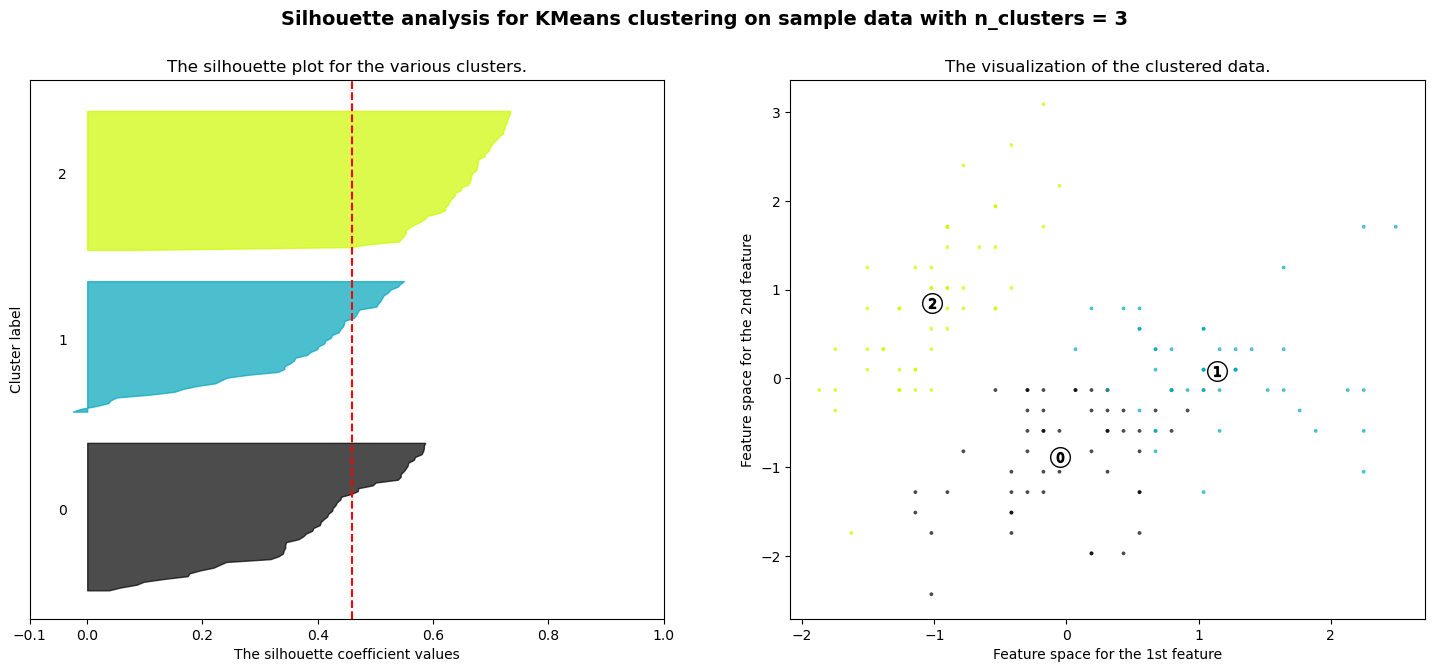

c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.383850922475103


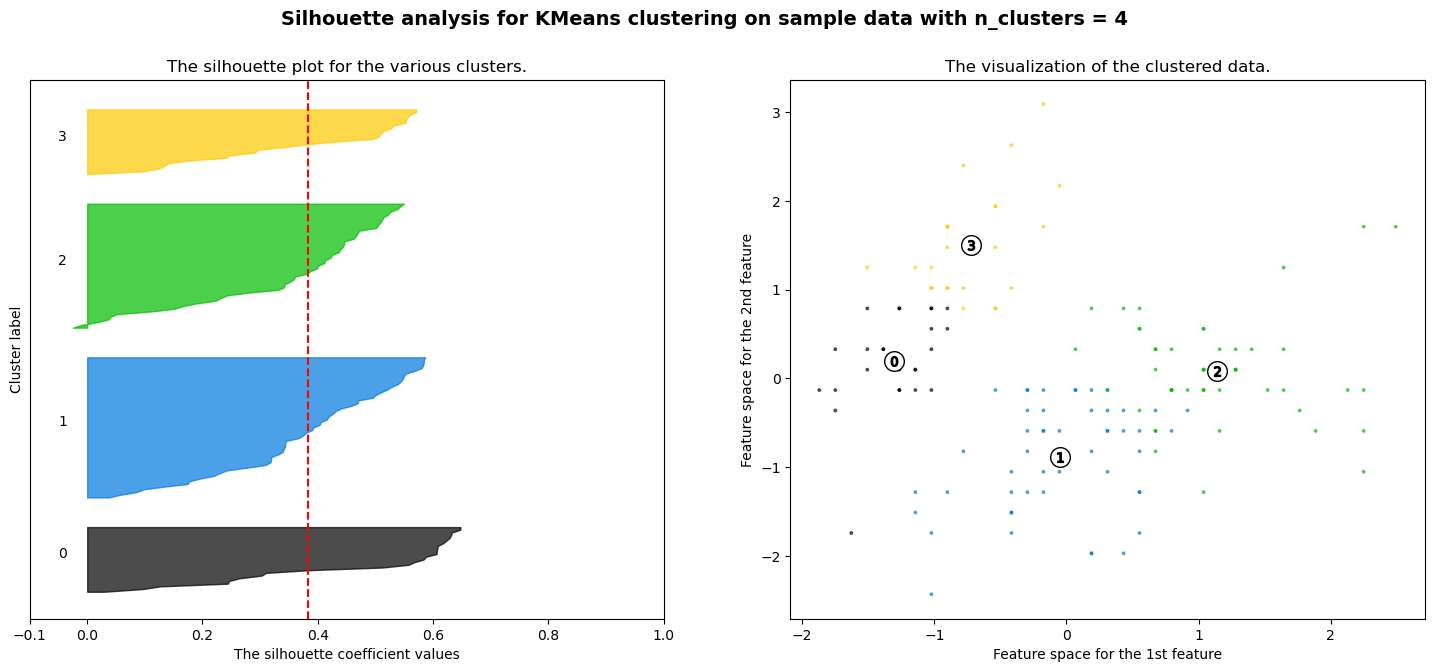

c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\ProgramData\anaconda3\envs\conda_env\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.34273996820787694


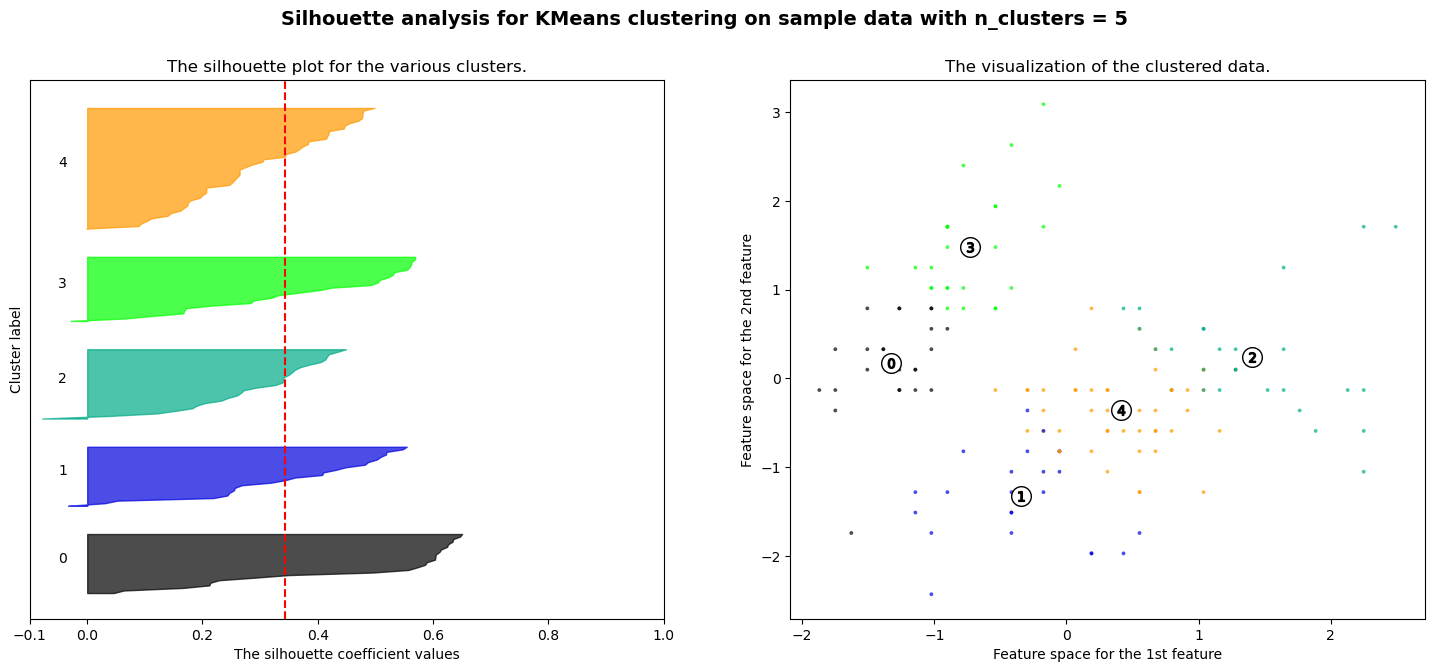

In [60]:
plot_silhouette(data_scaled, [2, 3, 4, 5])